<a href="https://colab.research.google.com/github/rukmals/Pump-it-Up-Challange/blob/main/Pump_it_Up_Challange_170571N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
!ls '/content/drive/MyDrive/PumpItUp'

SubmissionFormat.csv  TrainingSetLabels.csv
TestSetValues.csv     TrainingSetValues.csv


## Import Libraries 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Import Data

In [4]:
training_set = pd.read_csv("/content/drive/MyDrive/PumpItUp/TrainingSetValues.csv")
training_labels = pd.read_csv("/content/drive/MyDrive/PumpItUp/TrainingSetLabels.csv")
test_set = pd.read_csv("/content/drive/MyDrive/PumpItUp/TestSetValues.csv")
submission_format = pd.read_csv("/content/drive/MyDrive/PumpItUp/SubmissionFormat.csv")

## Exploring the Data

In [5]:
training_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
training_set.shape

(59400, 40)

In [7]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [26]:
training_set.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


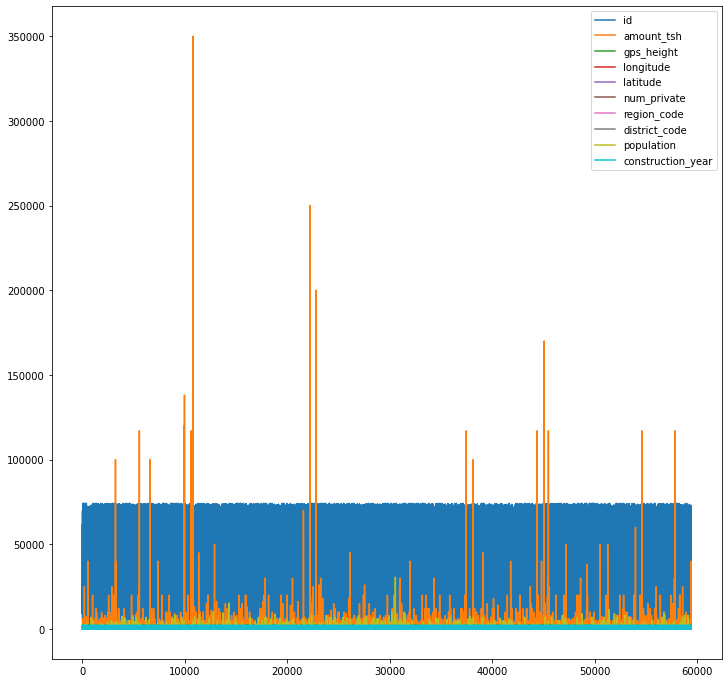

In [9]:
training_set.plot(figsize = (12, 12 ))

## Create copy of training set and training labels

In [45]:
training_set_copy = training_set.copy()
training_labels_copy = training_labels.copy()
test_set_copy = test_set.copy()

## Analysing Categorical Data

In [12]:
training_set_categorical = training_set_copy.select_dtypes(include=['object'])
training_set_categorical.shape

(59400, 30)

In [13]:
training_set_categorical.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [14]:
training_set_categorical.describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

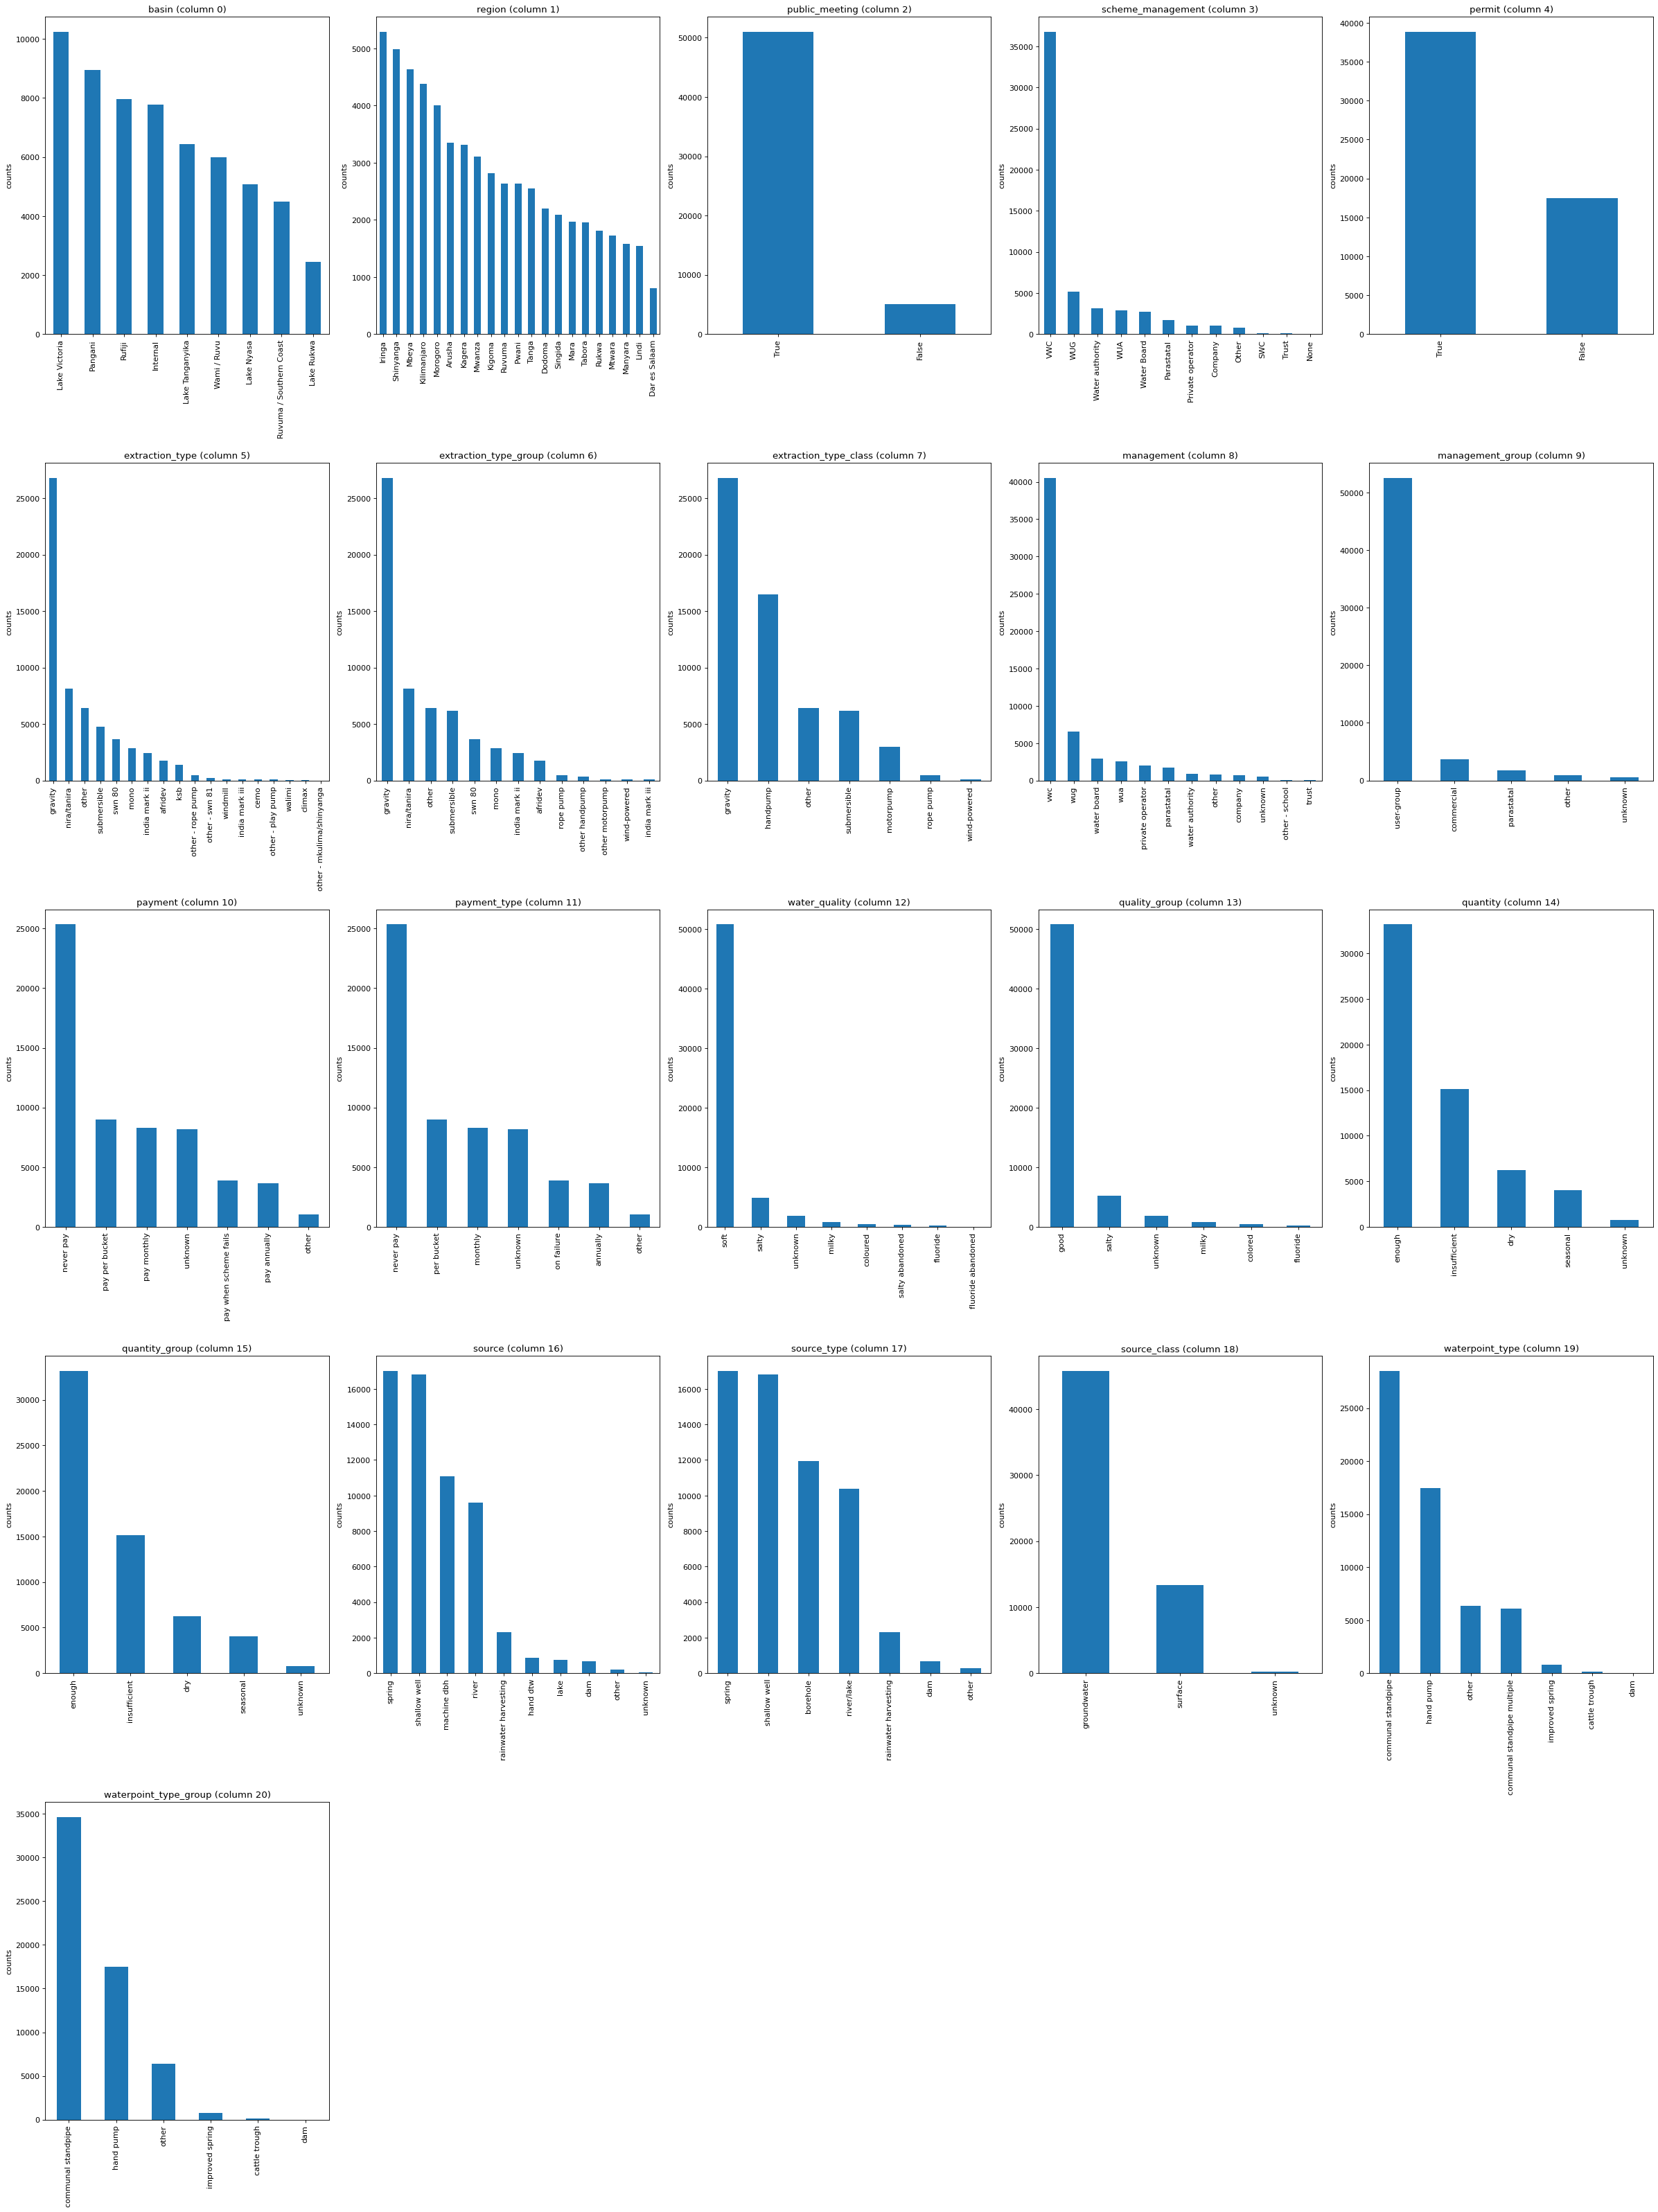

In [19]:
plotPerColumnDistribution(training_set_categorical, 23, 5)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Analysing Target

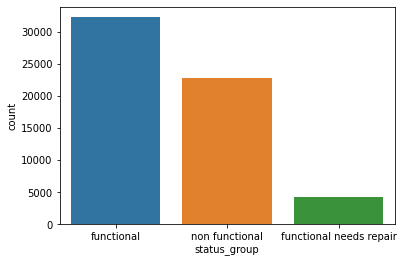

In [16]:
sns.countplot(x='status_group', data=training_labels_copy)

## Find Corellation

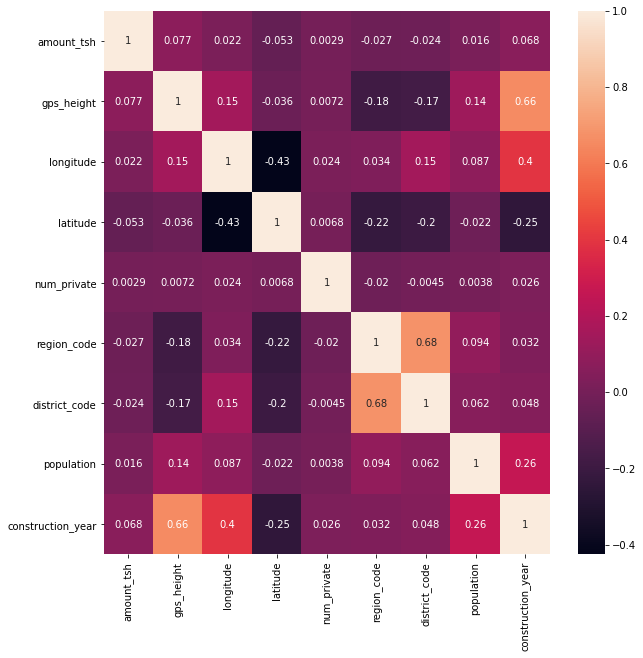

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(training_set_copy.drop('id',axis = 1).corr(),annot=True)

## Investigating Numercal Columns

In [20]:
training_set_copy.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


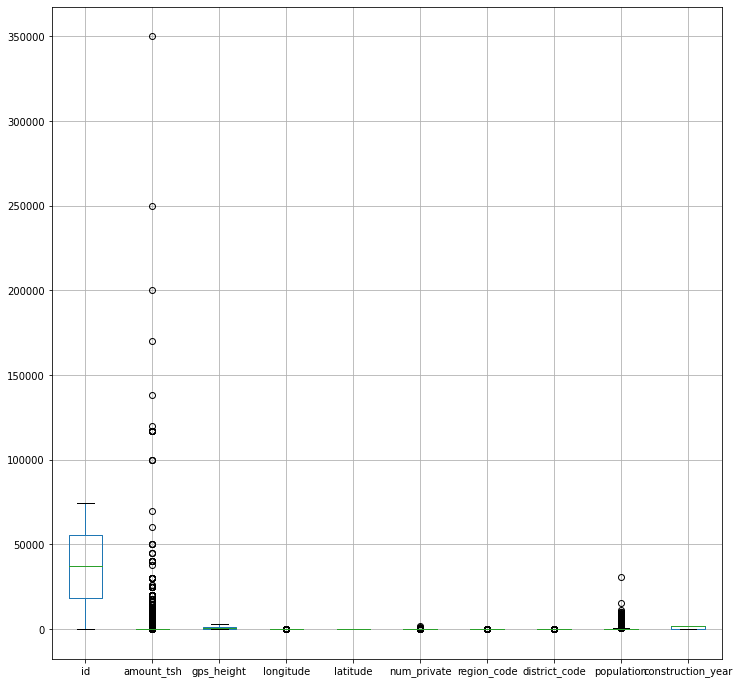

In [21]:
training_set_copy.boxplot(figsize = (12, 12))

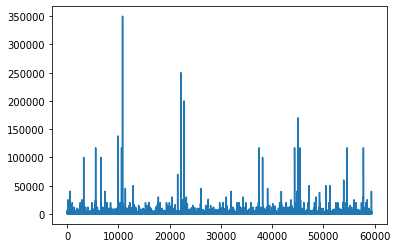

In [22]:
training_set_copy['amount_tsh'].plot()

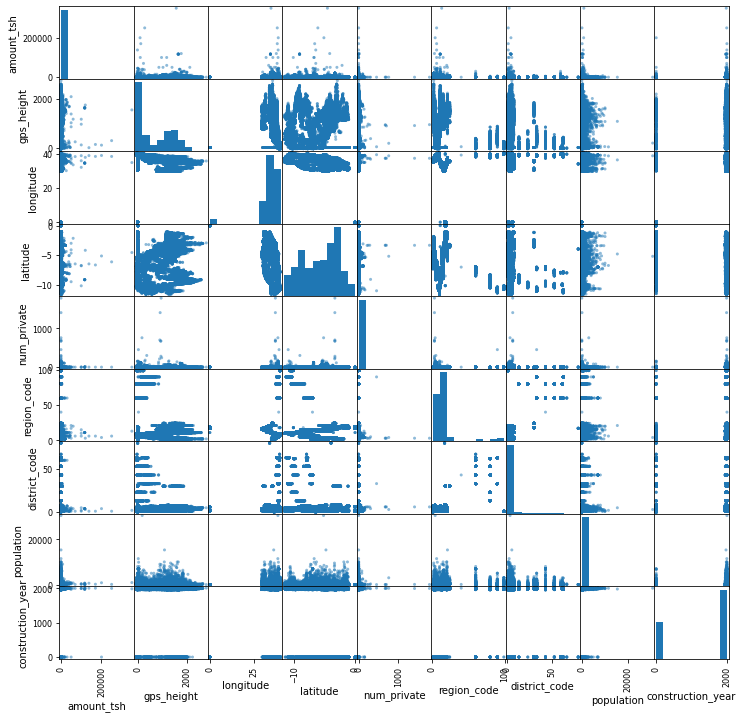

In [24]:
pd.plotting.scatter_matrix(training_set_copy.drop('id' , axis = 1 ) , figsize = (12, 12))
plt.show()

## Feature Engineering

In [28]:
training_set_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400,NaN,NaN,NaN,37115.1,21453.1,0,18519.8,37061.5,55656.5,74247
amount_tsh,59400,NaN,NaN,NaN,317.65,2997.57,0,0,0,20,350000
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55765,1897,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400,NaN,NaN,NaN,668.297,693.116,-90,0,369,1319.25,2770
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400,NaN,NaN,NaN,34.0774,6.56743,0,33.0903,34.9087,37.1784,40.3452
latitude,59400,NaN,NaN,NaN,-5.70603,2.94602,-11.6494,-8.54062,-5.0216,-3.32616,-2e-08
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400,NaN,NaN,NaN,0.474141,12.2362,0,0,0,0,1776


# 2. Dropping similar features¶
## The following groups of features

##### (extraction_type, extraction_type_group, extraction_type_class),
##### (payment, payment_type),
##### (water_quality, quality_group),
##### (source, source_type),
##### (subvillage, region, region_code, district_code, lga, ward),
##### (waterpoint_type, waterpoint_type_group)
##### (scheme_name, scheme_management)

In [35]:
training_set_copy.source_type

0                      spring
1        rainwater harvesting
2                         dam
3                    borehole
4        rainwater harvesting
                 ...         
59395                  spring
59396              river/lake
59397                borehole
59398            shallow well
59399            shallow well
Name: source_type, Length: 59400, dtype: object

In [37]:
training_set_copy.source

0                      spring
1        rainwater harvesting
2                         dam
3                 machine dbh
4        rainwater harvesting
                 ...         
59395                  spring
59396                   river
59397             machine dbh
59398            shallow well
59399            shallow well
Name: source, Length: 59400, dtype: object

In [33]:
training_set_copy.source_class

0        groundwater
1            surface
2            surface
3        groundwater
4            surface
            ...     
59395    groundwater
59396        surface
59397    groundwater
59398    groundwater
59399    groundwater
Name: source_class, Length: 59400, dtype: object

In [40]:
training_set_copy.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [43]:
training_set_copy.wpt_name.value_counts()

none                 3563
Shuleni              1748
Zahanati              830
Msikitini             535
Kanisani              323
                     ... 
Kwa Mabesele            1
Biturana Mtoni          1
Kwa Bibi                1
Kwa Ezekia              1
Kwa Absalum Gadau       1
Name: wpt_name, Length: 37400, dtype: int64

In [46]:
train_df = training_set_copy.drop(['installer','management_group','id', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)

In [47]:
test_df = test_set_copy.drop(['installer','management_group','id', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)

In [48]:
train_df.head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type
0,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,True,VWC,False,1999,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,280,NaN,Other,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
2,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,250,True,VWC,True,2009,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple
3,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,VWC,True,1986,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple
4,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,0,True,NaN,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


## Dealing with NaN values

In [54]:
train_df.isna().sum().sort_values(ascending=False).shape

(22,)

In [50]:
test_df.isna().sum().sort_values(ascending=False)

scheme_management    969
funder               869
public_meeting       821
permit               737
population             0
date_recorded          0
gps_height             0
longitude              0
latitude               0
basin                  0
region_code            0
district_code          0
waterpoint_type        0
source_class           0
construction_year      0
extraction_type        0
management             0
payment_type           0
quality_group          0
quantity_group         0
source                 0
amount_tsh             0
dtype: int64

In [51]:
# Filling Missing Values with most frequent values

def mf(data):
    string_column = data.columns 
    for name in string_column:
        x = data[name].value_counts()
        df = pd.DataFrame(x)
        df = df.reset_index()
        most_frequent = df.loc[0]['index']
        data[name] = data[name].fillna(most_frequent)
    #print(data)
    return data
training_set_feature_engineering = mf(train_df)
test_set = mf(test_df)


In [56]:
training_set_feature_engineering.isna().sum().sort_values(ascending=False)

waterpoint_type      0
source_class         0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
amount_tsh           0
dtype: int64

In [60]:
test_set.isna().sum().sort_values(ascending=False)

waterpoint_type      0
source_class         0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
amount_tsh           0
dtype: int64

# Feature Engineering

## Get number of unique entries in each column with categorical data

In [58]:
cat_vars = train_df.select_dtypes(include='object').columns
object_nunique = list(map(lambda col: train_df[col].nunique(), cat_vars))
d = dict(zip(cat_vars, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('source_class', 3),
 ('quantity_group', 5),
 ('quality_group', 6),
 ('payment_type', 7),
 ('waterpoint_type', 7),
 ('basin', 9),
 ('source', 10),
 ('scheme_management', 12),
 ('management', 12),
 ('extraction_type', 18),
 ('date_recorded', 356),
 ('funder', 1897)]

## Reducing cardinality


In [61]:
train_df.scheme_management.value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [63]:
## scheme_management
def scheme_wrangler(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    else:
        return 'other'
train_df['scheme_management'] = train_df.apply(lambda row: scheme_wrangler(row), axis=1)
test_set['scheme_management'] = test_set.apply(lambda row: scheme_wrangler(row), axis=1)

In [64]:
train_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [65]:
## extraction_type
def extraction_wrangler(row):
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira/tanira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn_80'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'india_mark_ii'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    else:
        return 'other'
train_df['extraction_type'] = train_df.apply(lambda row: extraction_wrangler(row), axis=1)
test_set['extraction_type'] = test_set.apply(lambda row: extraction_wrangler(row), axis=1)

In [66]:
train_df.funder.value_counts()

Government Of Tanzania            12719
Danida                             3114
Hesawa                             2202
Rwssp                              1374
World Bank                         1349
                                  ...  
Village Council/ Rose Kawala          1
Compasion International               1
Mafwimbo                              1
Grazie Grouppo Padre Fiorentin        1
Tansi                                 1
Name: funder, Length: 1897, dtype: int64

In [67]:
## funder
def funder_wrangler(row):  
    '''Keep top 8 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'   
    elif row['funder']=='Kkkt':
        return 'kkkt'   
    elif row['funder']=='World Vision':
        return 'world_vision'  
    elif row['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
train_df['funder'] = train_df.apply(lambda row: funder_wrangler(row), axis=1)
test_set['funder'] = test_set.apply(lambda row: funder_wrangler(row), axis=1)

# Ordinal encoding of categorical data

In [68]:
train_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [69]:
order_dict_quality = {"good":4,"salty":3,"milky":2,"colored":2,"fluoride":2,"unknown":1}
train_df["quality_group_code"] = [order_dict_quality[item] for item in train_df.quality_group]
del train_df["quality_group"]

test_set["quality_group_code"] = [order_dict_quality[item] for item in test_set.quality_group]
del test_set["quality_group"]

In [70]:
train_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [71]:
order_dict_quantity = {"enough":4,"insufficient":3,"dry":2,"seasonal":2,"unknown":1}
train_df["quantity_group_code"] = [order_dict_quantity[item] for item in train_df.quantity_group] 
del train_df["quantity_group"]

test_set["quantity_group_code"] = [order_dict_quantity[item] for item in test_set.quantity_group] 
del test_set["quantity_group"]

In [72]:
train_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [73]:
order_dict_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}
train_df["payment_code"] = [order_dict_payment[item] for item in train_df.payment_type] 
del train_df["payment_type"]

test_set["payment_code"] = [order_dict_payment[item] for item in test_set.payment_type] 
del test_set["payment_type"]

In [74]:
train_df.public_meeting.value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

In [75]:
order_dict_pub_meet = {True:1,False:0}
train_df["public_meeting_code"] = [order_dict_pub_meet[item] for item in train_df.public_meeting] 
del train_df["public_meeting"]

test_set["public_meeting_code"] = [order_dict_pub_meet[item] for item in test_set.public_meeting] 
del test_set["public_meeting"]

In [76]:
train_df.permit.value_counts()

True     41908
False    17492
Name: permit, dtype: int64

In [77]:
order_dict_permit = {True:1,False:0}
train_df["permit_code"] = [order_dict_pub_meet[item] for item in train_df.permit] 
del train_df["permit"]

test_set["permit_code"] = [order_dict_pub_meet[item] for item in test_set.permit] 
del test_set["permit"]

### create new variables based on the features in the dataset that will better describe the target.

In [78]:
train_df.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
train_df.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

test_set.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
test_set.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [89]:
train_df_copy = train_df.copy()
test_set_copy = test_set.copy()
cols = ["latitude","longitude","gps_height"]

X_train_std = sc.fit_transform(train_df_copy[cols])
X_test_std = sc.fit_transform(test_set_copy[cols])

lda = LDA(n_components=None)
train_df_lda = lda.fit_transform(X_train_std,training_labels_copy.status_group)
test_set_lda = lda.transform(X_test_std)

train_df_copy = pd.concat((pd.DataFrame(train_df_lda), train_df_copy), axis=1)
test_set_copy = pd.concat((pd.DataFrame(test_set_lda), test_set_copy), axis=1)

In [90]:
for i in cols:
    del train_df_copy[i]
    del test_set_copy[i]

In [91]:
train_df_copy.rename(columns={0: "LDA_0",1:"LDA_1"},inplace=True)
test_set_copy.rename(columns={0: "LDA_0",1:"LDA_1"},inplace=True)

In [95]:
train_df_copy.head()

,LDA_0,LDA_1,amount_tsh,date_recorded,funder,basin,region_code,district_code,population,scheme_management,construction_year,extraction_type,management,source,source_class,waterpoint_type,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code
0,0.393952,-0.817902,0.0,2011-03-14,other,Lake Nyasa,11,5,109,other,1999,gravity,vwc,spring,groundwater,communal standpipe,4,4,4,1,0
1,0.580239,-1.027575,0.0,2013-03-06,other,Lake Victoria,20,2,280,other,2010,gravity,wug,rainwater harvesting,surface,communal standpipe,4,3,2,1,1
2,-0.411278,-0.318203,0.0,2013-02-25,other,Pangani,21,4,250,other,2009,gravity,vwc,dam,surface,communal standpipe multiple,4,4,3,1,1
3,-1.036210,0.324573,0.0,2013-01-28,unicef,Ruvuma / Southern Coast,90,63,58,other,1986,submersible,vwc,machine dbh,groundwater,communal standpipe multiple,4,2,2,1,1
4,-0.070855,0.911349,0.0,2011-07-13,other,Lake Victoria,18,1,0,other,0,gravity,other,rainwater harvesting,surface,communal standpipe,4,2,2,1,1


In [94]:
test_set_copy.shape

(14850, 21)

In [96]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df_copy['construction_year'] = train_df_copy.apply(lambda row: construction_wrangler(row), axis=1)
test_set_copy['construction_year'] = test_set_copy.apply(lambda row: construction_wrangler(row), axis=1)

In [97]:
train_df_copy.date_recorded = pd.to_datetime(train_df_copy.date_recorded)
test_set_copy.date_recorded = pd.to_datetime(test_set_copy.date_recorded)

train_df_copy.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [98]:
train_df_copy['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(train_df_copy.date_recorded)
train_df_copy['days_since_recorded'] = train_df_copy['days_since_recorded'].astype('timedelta64[D]').astype(int)

test_set_copy['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(test_set_copy.date_recorded)
test_set_copy['days_since_recorded'] = test_set_copy['days_since_recorded'].astype('timedelta64[D]').astype(int)

In [99]:
train_df_copy['days_since_recorded']

0         995
1         272
2         281
3         309
4         874
         ... 
59395     214
59396     941
59397     967
59398    1001
59399     986
Name: days_since_recorded, Length: 59400, dtype: int64

In [100]:
train_df_copy = train_df_copy.drop("date_recorded",axis=1)
test_set_copy = test_set_copy.drop("date_recorded",axis=1)

In [101]:
train_df_copy.shape

(59400, 21)

In [102]:
test_set_copy.shape

(14850, 21)

## One-hot encoding


In [103]:
cat_vars = train_df_copy.select_dtypes(include='object').columns
print(cat_vars)
len(cat_vars)

Index(['funder', 'basin', 'scheme_management', 'construction_year',
       'extraction_type', 'management', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')


9

In [104]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df_copy[cat_vars])).astype(np.int64)
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_set_copy[cat_vars])).astype(np.int64)

# One-hot encoding removed index; put it back
OH_cols_train.index = train_df_copy.index
OH_cols_test.index = test_set_copy.index

OH_cols_train.columns = OH_encoder.get_feature_names(cat_vars)
OH_cols_test.columns = OH_encoder.get_feature_names(cat_vars)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df_copy.drop(cat_vars, axis=1)
num_X_valid = test_set_copy.drop(cat_vars, axis=1)

# Add one-hot encoded columns to numerical features
OH_train_df = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_valid, OH_cols_test], axis=1)

In [105]:
OH_train_df.head()

,LDA_0,LDA_1,amount_tsh,region_code,district_code,population,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code,days_since_recorded,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,funder_unicef,funder_world_bank,funder_world_vision,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,scheme_management_other,construction_year_00s,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_india_mark_ii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_swn_80,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.393952,-0.817902,0.0,11,5,109,4,4,4,1,0,995,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0.580239,-1.027575,0.0,20,2,280,4,3,2,1,1,272,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-0.411278,-0.318203,0.0,21,4,250,4,4,3,1,1,281,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,-1.036210,0.324573,0.0,90,63,58,4,2,2,1,1,309,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.070855,0.911349,0.0,18,1,0,4,2,2,1,1,874,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


# Feature Selection

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X, y = OH_train_df[OH_train_df.columns], training_labels_copy.drop('id', axis=1)

# Set the regularization parameter C=1
logistic = LogisticRegression(solver="saga",C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

array([[ 0.39395219, -0.81790228, 11.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58023946, -1.02757534, 20.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.41127849, -0.31820282, 21.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59598342,  0.89729249, 12.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.80255208,  0.69781717,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95931514,  0.31560093,  5.        , ...,  1.        ,
         0.        ,  0.        ]])

In [108]:
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]

In [109]:
len(selected_columns)

70

In [110]:
selected_columns

Index(['LDA_0', 'LDA_1', 'region_code', 'district_code', 'population',
       'quality_group_code', 'quantity_group_code', 'payment_code',
       'public_meeting_code', 'permit_code', 'days_since_recorded',
       'funder_danida', 'funder_gov', 'funder_hesawa', 'funder_other',
       'funder_rwssp', 'funder_unicef', 'funder_world_bank',
       'funder_world_vision', 'basin_Internal', 'basin_Lake Nyasa',
       'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
       'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
       'basin_Wami / Ruvu', 'construction_year_00s', 'construction_year_10s',
       'construction_year_60s', 'construction_year_70s',
       'construction_year_80s', 'construction_year_90s',
       'construction_year_unknown', 'extraction_type_afridev',
       'extraction_type_gravity', 'extraction_type_india_mark_ii',
       'extraction_type_ksb', 'extraction_type_mono',
       'extraction_type_nira/tanira', 'extraction_type_other',
      

In [111]:
train_df_selected_features = OH_train_df[selected_columns].join(y)
X_test_selected_features = OH_X_test[selected_columns]

# Feature Imbalance

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',min_samples_split=8, n_estimators=1000,
                           random_state = 7)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [113]:
# helper function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [114]:
base_imp = imp_df(X.columns, rf.feature_importances_)
top_30_imp = base_imp[0:30]
top_30_features = top_30_imp.feature

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [117]:
pylab.rcParams["figure.figsize"] = (10,15)

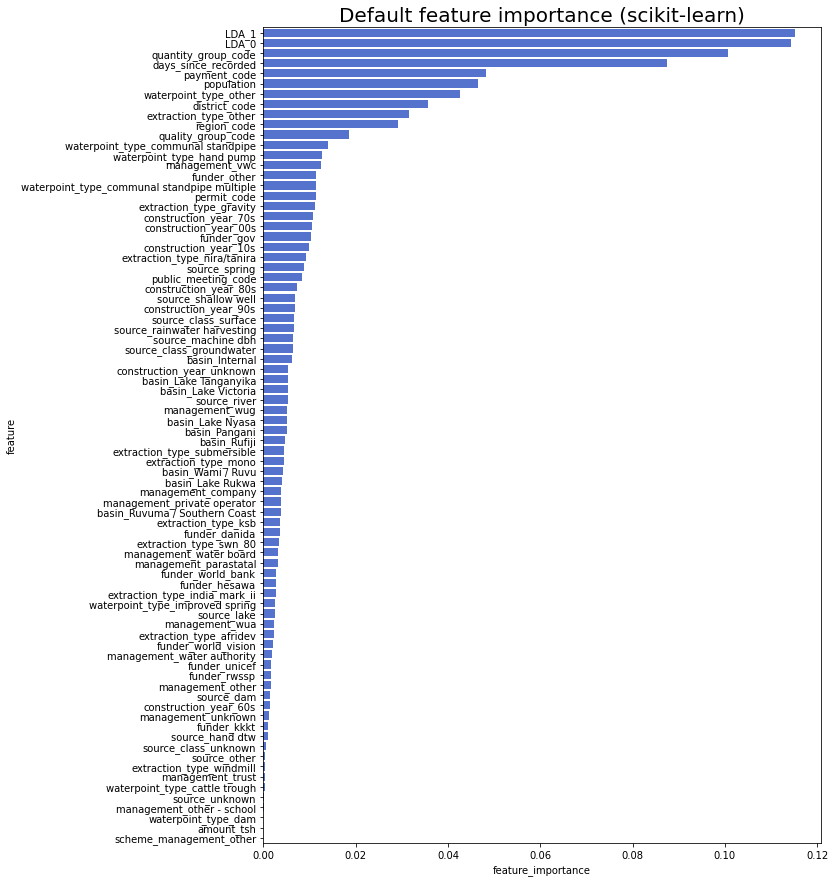

In [118]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [124]:
train_df_selected_features.head()


,LDA_0,LDA_1,region_code,district_code,population,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code,days_since_recorded,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_unicef,funder_world_bank,funder_world_vision,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,construction_year_00s,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_india_mark_ii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_swn_80,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,source_dam,source_hand dtw,source_lake,source_machine dbh,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_class_groundwater,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group
0,0.393952,-0.817902,11,5,109,4,4,4,1,0,995,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,functional
1,0.580239,-1.027575,20,2,280,4,3,2,1,1,272,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,functional
2,-0.411278,-0.318203,21,4,250,4,4,3,1,1,281,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,functional
3,-1.036210,0.324573,90,63,58,4,2,2,1,1,309,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,non functional
4,-0.070855,0.911349,18,1,0,4,2,2,1,1,874,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,functional


In [122]:
print(train_df_selected_features.shape)

(59400, 71)


In [125]:
X_test_selected_features.head()


,LDA_0,LDA_1,region_code,district_code,population,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code,days_since_recorded,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_unicef,funder_world_bank,funder_world_vision,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,construction_year_00s,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_india_mark_ii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_swn_80,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,source_dam,source_hand dtw,source_lake,source_machine dbh,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_class_groundwater,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.963202,-1.758696,21,3,321,4,2,2,1,1,302,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0.441770,-1.360479,2,2,300,4,3,2,1,1,302,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,0.664575,-1.174769,13,2,500,4,3,2,1,1,305,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,-0.932280,0.288077,80,43,250,4,2,1,1,1,315,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0.267461,-0.652930,10,3,60,4,4,4,1,1,251,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0


# Model Development

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Random Forest

In [126]:
labels_train = train_df_selected_features.status_group

In [127]:
train_data_frame = train_df_selected_features.copy()

In [128]:
train_data_frame = train_data_frame.drop('status_group', axis = 1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(criterion='entropy', n_estimators = 2000,min_samples_split=8,random_state=42,verbose=5)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF.fit(X_train,y_train)

y_pred_RF=clf_RF.predict(X_test)
y_train_pred_RF = clf_RF.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:

### Use Grid Search

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [300,500,1000],
    'min_samples_split' : [8,10,12],
    'max_features' : ['sqrt','log2']
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train.values.ravel())

In [157]:
cv.best_params_

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(criterion='gini', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5,max_features='sqrt')#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)

clf_RF.fit(X_train,y_train)

y_pred_RF=clf_RF.predict(X_test)
y_train_pred_RF = clf_RF.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
buildi

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:

In [166]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.9114057239057239
test accuracy=  0.8000841750841751


In [ ]:
y_pred_RF

# GradientBoostingClassifier

In [167]:

GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X_train, y_train)     

      Iter       Train Loss   Remaining Time 
         1       40423.0086            2.52m
         2       38810.4026            2.51m
         3       37329.5972            2.54m
         4       36001.5769            2.53m
         5       34799.4751            2.52m
         6       33712.7056            2.52m
         7       32685.3899            2.51m
         8       31697.4127            2.50m
         9       30876.1125            2.48m
        10       30068.2858            2.47m
        11       29320.5649            2.45m
        12       28639.8639            2.42m
        13       27994.3854            2.40m
        14       27428.0173            2.38m
        15       26882.1493            2.36m
        16       26368.2454            2.34m
        17       25893.4011            2.32m
        18       25425.1442            2.31m
        19       24971.2270            2.29m
        20       24570.9426            2.27m
        21       24167.4708            2.26m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=14,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [168]:
y_pred_GB=GB.predict(X_test)
y_train_pred_GB = GB.predict(X_train)
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_GB))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_GB))

train accuracy=  0.9182239057239058
test accuracy=  0.8012626262626262


## CatBoost

In [135]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [139]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [140]:
from catboost import CatBoostClassifier
params= {'loss_function':'MultiClass',
          'verbose': 200,
           'learning_rate':0.4,
           'random_seed':42,
          'iterations':1000
         }

model_catboost = CatBoostClassifier(**params)
model_catboost.fit(X_train_CB,y_train_CB)

0:	learn: 0.8888776	total: 90.1ms	remaining: 1m 29s
200:	learn: 0.4743171	total: 6.22s	remaining: 24.7s
400:	learn: 0.4226565	total: 12.3s	remaining: 18.4s
600:	learn: 0.3907956	total: 18.4s	remaining: 12.2s
800:	learn: 0.3646267	total: 24.7s	remaining: 6.13s
999:	learn: 0.3444692	total: 30.8s	remaining: 0us


In [141]:
y_train_pred_CB = model_catboost.predict(X_train_CB)
y_pred_CB = model_catboost.predict(X_test_CB)
print("train accuracy= ",metrics.accuracy_score(y_train_CB, y_train_pred_CB))
print("test accuracy= ", metrics.accuracy_score(y_test_CB, y_pred_CB))

train accuracy=  0.8677819865319866
test accuracy=  0.7938552188552188


In [142]:
y_pred_CB

array([['non functional'],
       ['functional'],
       ['functional'],
       ...,
       ['non functional'],
       ['functional'],
       ['functional']], dtype=object)

# Submission

In [143]:
submission_format.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [169]:
#submission_pred=model_catboost.predict(X_test_selected_features)
submission_pred = GB.predict(X_test_selected_features)

In [170]:
submission_pred[:]

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [171]:
submission_pred_DF = pd.DataFrame(
    {
        "id": submission_format.id,
        "status_group": submission_pred
    },
    index = submission_format.index
)
print("y_preds.shape:", submission_pred_DF.shape)
submission_pred_DF.head()

y_preds.shape: (14850, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [172]:
df = submission_pred_DF
df.to_csv('out9.csv', index=False)